1-Qadam. Kerakli kutubxonalarni import qilamiz va Grafik sozlamalarini to'g'irlaymiz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

2-Qadam. Tozalagan data setimizni yuklaymiz va tekshiramiz

In [3]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.35,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),70.35,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(f"Qatorlar: {len(df)}")
print(f"Ustunlar: {len(df.columns)}")
print(f"Missing values: {df.isnull().sum().sum()}")

Qatorlar: 6973
Ustunlar: 21
Missing values: 0


In [6]:
print("Ustunlar ro'yxati:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Ustunlar ro'yxati:
1. customerID
2. gender
3. SeniorCitizen
4. Partner
5. Dependents
6. tenure
7. PhoneService
8. MultipleLines
9. InternetService
10. OnlineSecurity
11. OnlineBackup
12. DeviceProtection
13. TechSupport
14. StreamingTV
15. StreamingMovies
16. Contract
17. PaperlessBilling
18. PaymentMethod
19. MonthlyCharges
20. TotalCharges
21. Churn


3-Qadam. Churn ustuniga e'tibor beramiz va undagi qiymatlarni tekshiramiz. 
Taqsimotdagi Yes/No qiymatlarni ikkilik sistemaga 1 va 0 qiymatlariga aylantiramiz.
Yangi qiymatlarni tekshiramiz va churn darajasini aniqlaymiz.

In [ ]:
churn_counts=df['Churn'].value_counts()
print(f"Churn taqsimoti:")
churn_counts

Churn taqsimoti:


Churn
No     5126
Yes    1847
Name: count, dtype: int64

In [ ]:
print(f"Unique qiymatlar:{df['Churn'].unique()}")

Unique qiymatlar: ['No' 'Yes']


In [9]:
if df['Churn'].dtype=='object':
    df['Churn']=df['Churn'].map({'No': 0, 'Yes': 1})
    print("Churn 0/1 ga aylantirildi")

Churn 0/1 ga aylantirildi


In [10]:
print(f"Yangi qiymatlar: {df['Churn'].unique()}")
churn_rate=df['Churn'].mean()
print(f"Churn darajasi: {churn_rate:.1%}")

Yangi qiymatlar: [0 1]
Churn darajasi: 26.5%


4-Qadam. Churn statistikasini visual ko'rinishga keltiramiz. Pie chart mijozlarning qolish/ketish foiz nisbatini ko'rsatadi, bar chart esa mijozlarning mutlaq sonini taqqoslaydi

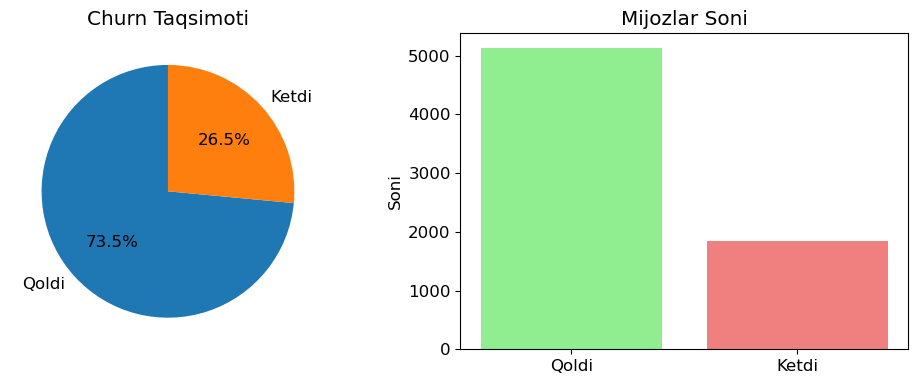

In [15]:
# 5.1 Churn taqsimoti
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts.values, labels=['Qoldi', 'Ketdi'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Taqsimoti')

plt.subplot(1, 2, 2)
plt.bar(['Qoldi', 'Ketdi'], churn_counts.values, color=['lightgreen', 'lightcoral'])
plt.title('Mijozlar Soni')
plt.ylabel('Soni')

plt.tight_layout()
plt.show()

5-Qadam. Mijozlarning xizmat muddati (tenure) va ketish (Churn) o'rtasidagi bog'liqlikni tahlil qilamiz.

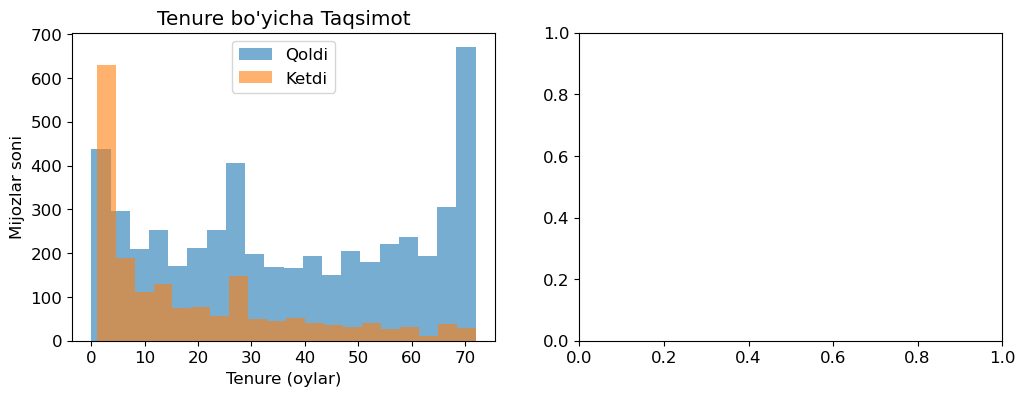

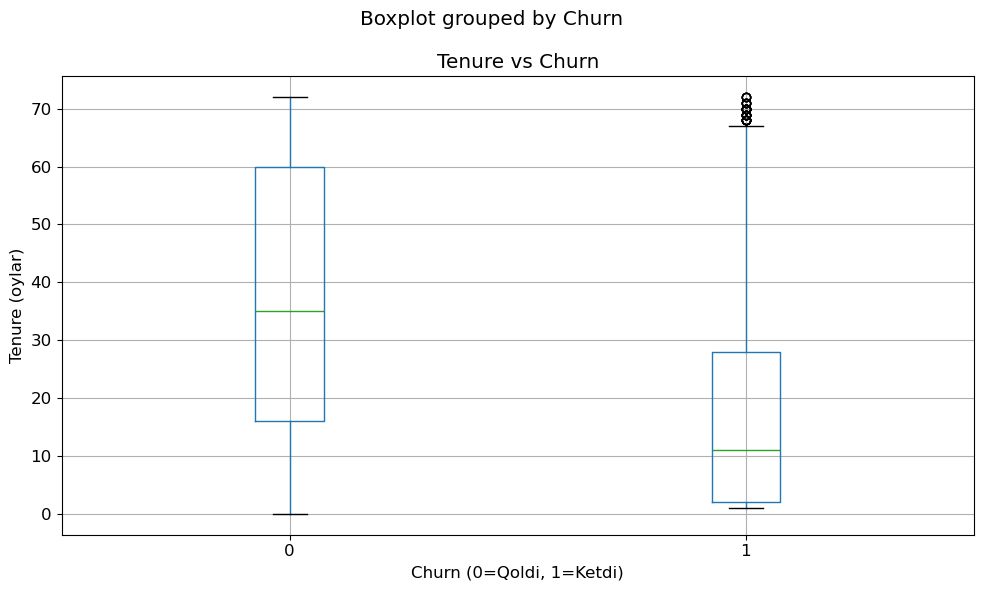

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
for churn in [0, 1]:
    subset = df[df['Churn'] == churn]['tenure']
    label = 'Qoldi' if churn == 0 else 'Ketdi'
    plt.hist(subset, bins=20, alpha=0.6, label=label)
plt.xlabel('Tenure (oylar)')
plt.ylabel('Mijozlar soni')
plt.title('Tenure bo\'yicha Taqsimot')
plt.legend()

plt.subplot(1, 2, 2)
df.boxplot(column='tenure', by='Churn')
plt.title('Tenure vs Churn')
plt.xlabel('Churn (0=Qoldi, 1=Ketdi)')
plt.ylabel('Tenure (oylar)')

plt.tight_layout()
plt.show()

# gistogrammadan ko'rinadiki, qisqa muddatli mijozlar (1-10 oy) ko'proq ketishadi
# uzoq muddatli mijozlar (60 oydan ko'proq) asosan kompaniyada qolishadi
# qutichali diagramma shuni ko'rsatadiki, ketgan mijozlarning median xizmat muddati qolgan mijozlarnikiga qaraganda ancha past


6-Qadam. Mijozlarning oylik to'lovi va shartnoma turi bo'yicha ketish tendentsiyalarini tahlil qilamiz

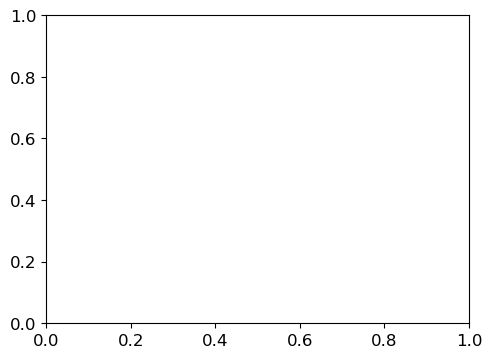

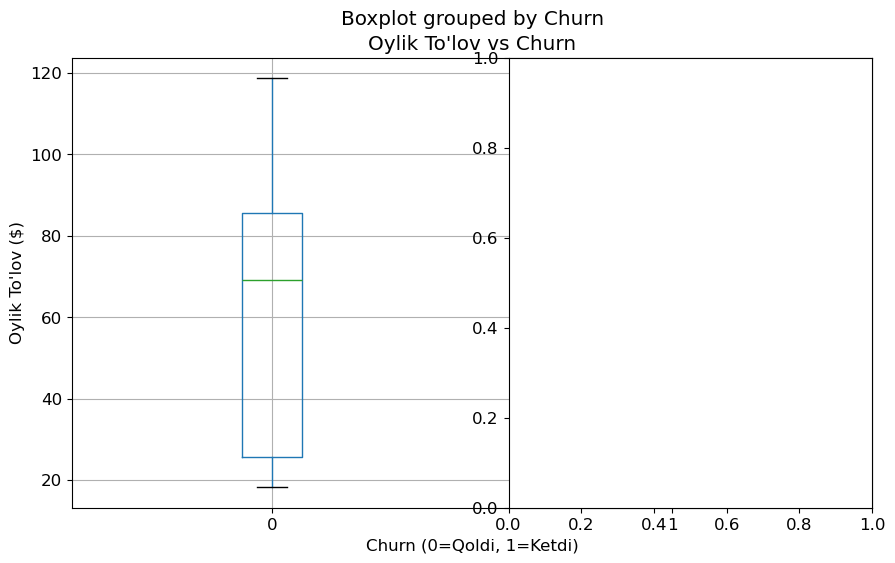

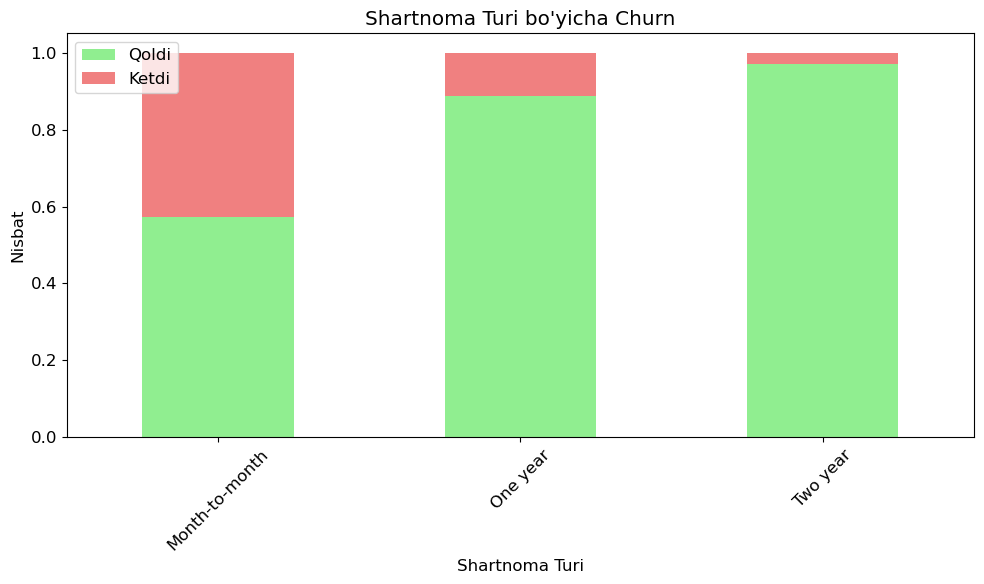

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df.boxplot(column='MonthlyCharges', by='Churn')
plt.title('Oylik To\'lov vs Churn')
plt.xlabel('Churn (0=Qoldi, 1=Ketdi)')
plt.ylabel('Oylik To\'lov ($)')

plt.subplot(1, 2, 2)
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
contract_churn.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'])
plt.title('Shartnoma Turi bo\'yicha Churn')
plt.xlabel('Shartnoma Turi')
plt.ylabel('Nisbat')
plt.legend(['Qoldi', 'Ketdi'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Boxplot shuni ko'rsatadiki, ketgan mijozlarning oylik to'lovlari (medianasi ~80$)
# qolgan mijozlarnikiga (~65$) qaraganda yuqori, bu qimmatroq xizmatlar olayotgan mijozlarning
# ko'proq ketish tendentsiyasini ko'rsatadi
# Bar chartdagi shartnoma turi bo'yicha tahlilga qarasak, oylik shartnomalilar ~43% ketish nisbati bilan eng ko'p xavf ostida
# bir yillik shartnomalilar ~23% ketish nisbati
# ikki yillik shartnomalilar esa faqat ~12% ketish nisbati bilan eng sodiq mijozlar guruhidir

7-Qadam. Ma'lumotlarni model uchun tayyorlaymiz

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Kategorik ustunlar: {categorical_columns}")


Kategorik ustunlar: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


8-Qadam. Label Encoding qilamiz

In [ ]:
df_model=df.copy()
label_encoders ={}

for col in categorical_columns:
    le = LabelEncoder()
    df_model[col]=le.fit_transform(df_model[col])
    label_encoders[col]=le
    print(f"{col} kodlandi")

customerID kodlandi
gender kodlandi
Partner kodlandi
Dependents kodlandi
PhoneService kodlandi
MultipleLines kodlandi
InternetService kodlandi
OnlineSecurity kodlandi
OnlineBackup kodlandi
DeviceProtection kodlandi
TechSupport kodlandi
StreamingTV kodlandi
StreamingMovies kodlandi
Contract kodlandi
PaperlessBilling kodlandi
PaymentMethod kodlandi


9-Qadam. CustomerID ni olib tashlaymiz agar mavjud bo'lsa

In [13]:
if 'customerID' in df_model.columns:
    df_model=df_model.drop('customerID', axis=1)
    print("customerID olib tashlandi")

print(f"Model uchun tayyorlangan o'lcham: {df_model.shape}")

customerID olib tashlandi
Model uchun tayyorlangan o'lcham: (6973, 20)


10-Qadam. Oddiy modellar yaratamiz, x/y ga ajratamiz va train/test splitni qo'llaymiz

In [15]:
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

print(f"Features: {X.shape[1]}")
print(f"Samples: {len(y)}")

Features: 19
Samples: 6973


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {len(X_train)}")
print(f"Test: {len(X_test)}")

Train: 5578
Test: 1395


11-Qadam. Samplelarni Logistik regressiya modelida o'qitamiz va accuracy score ni aniqlaymiz

In [17]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f"Logistic Regression aniqligi: {lr_accuracy:.3f}")

Logistic Regression aniqligi: 0.804


12-Qadam. Samplelarni Random Forest modelida o'qitamiz va accuracy score ni aniqlaymiz

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest aniqligi: {rf_accuracy:.3f}")

Random Forest aniqligi: 0.791


13-Qadam. Eng yaxshi modelni aniqlaymiz

In [19]:
if rf_accuracy > lr_accuracy:
    best_model = rf_model
    best_name = "Random Forest"
    best_accuracy = rf_accuracy
    best_pred = rf_pred
else:
    best_model = lr_model
    best_name = "Logistic Regression"
    best_accuracy = lr_accuracy
    best_pred = lr_pred

print(f"Eng yaxshi model: {best_name}")
print(f"Aniqlik: {best_accuracy:.1%}")

Eng yaxshi model: Logistic Regression
Aniqlik: 80.4%


14-Qadam. confusion matrix orqali qancha kishi qolishi va qancha kishi ketishini bashorat qilamiz

In [23]:
cm = confusion_matrix(y_test, best_pred)
print(f"Confusion Matrix:")
print(f"Haqiqat   Qoladi  Ketadi")
print(f"Qoladi    {cm[0,0]}  {cm[0,1]}")
print(f"Ketadi    {cm[1,0]}  {cm[1,1]}")

Confusion Matrix:
Haqiqat   Qoladi  Ketadi
Qoladi    919  101
Ketadi    172  203


15-Qadam. Yaratilgan pkl fayllarni models papkasiga saqlaymiz

In [24]:
import os
os.makedirs('../models', exist_ok=True)

In [25]:
joblib.dump(lr_model, '../models/logistic_regression.pkl')

joblib.dump(rf_model, '../models/random_forest.pkl')

joblib.dump(label_encoders, '../models/label_encoders.pkl')

feature_names = X.columns.tolist()
joblib.dump(feature_names, '../models/feature_names.pkl')

['../models/feature_names.pkl']